# 🐶End_to_End Multi_Class Dog Breed Classification.
 This notebook builds an end-to-end multi-class image classifier using Tensorflow and Tensorflow Hub
#### Problem 
* Identifiying the breed of dog given an image of the dog.
* when I am sitting at cafe and I take the photo of  a dog. I want to know its breed.
#### Data 
* The data we are using is from Kaggle's dog breed identification competition
#### Evaluation
* The evaluation is a file with predicition probabilities for each dog breed of each test image.
#### Features 
*  some information about the data 
    * we're dealing with Images(unstructured data) so it's probably best if we use deep learning or transfer learning
    * There 120 breeds of dogs.(120 different classes)
    * There are around 10,000+ images in the training set with label.
    * There are around 10,000+ images in testing set without label(we gonna predict the label)



##### Get our workspace Ready
 * Import Tensorflow
 * Import Tensorflow Hub
 * Make sure we are using Gpu

In [1]:
# Import tensorflow as tf
import tensorflow as tf
print(tf.__version__)
# Import tensorflow_hub as hub
import tensorflow_hub as hub
# Check if GPU is availabele
print(tf.config.list_physical_devices('GPU'))


2.19.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


##### Getting our data ready(turning into Tensors)
* with all machine learning models , our data has to be in numerical format.so that what we will be doing first is turning into Tensors(Numerical Representation)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# check the labels of the data 
import pandas as pd
labels = pd.read_csv("/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,fff43b07992508bc822f33d8ffd902ae,scottish_deerhound
freq,1,126


<Axes: xlabel='breed'>

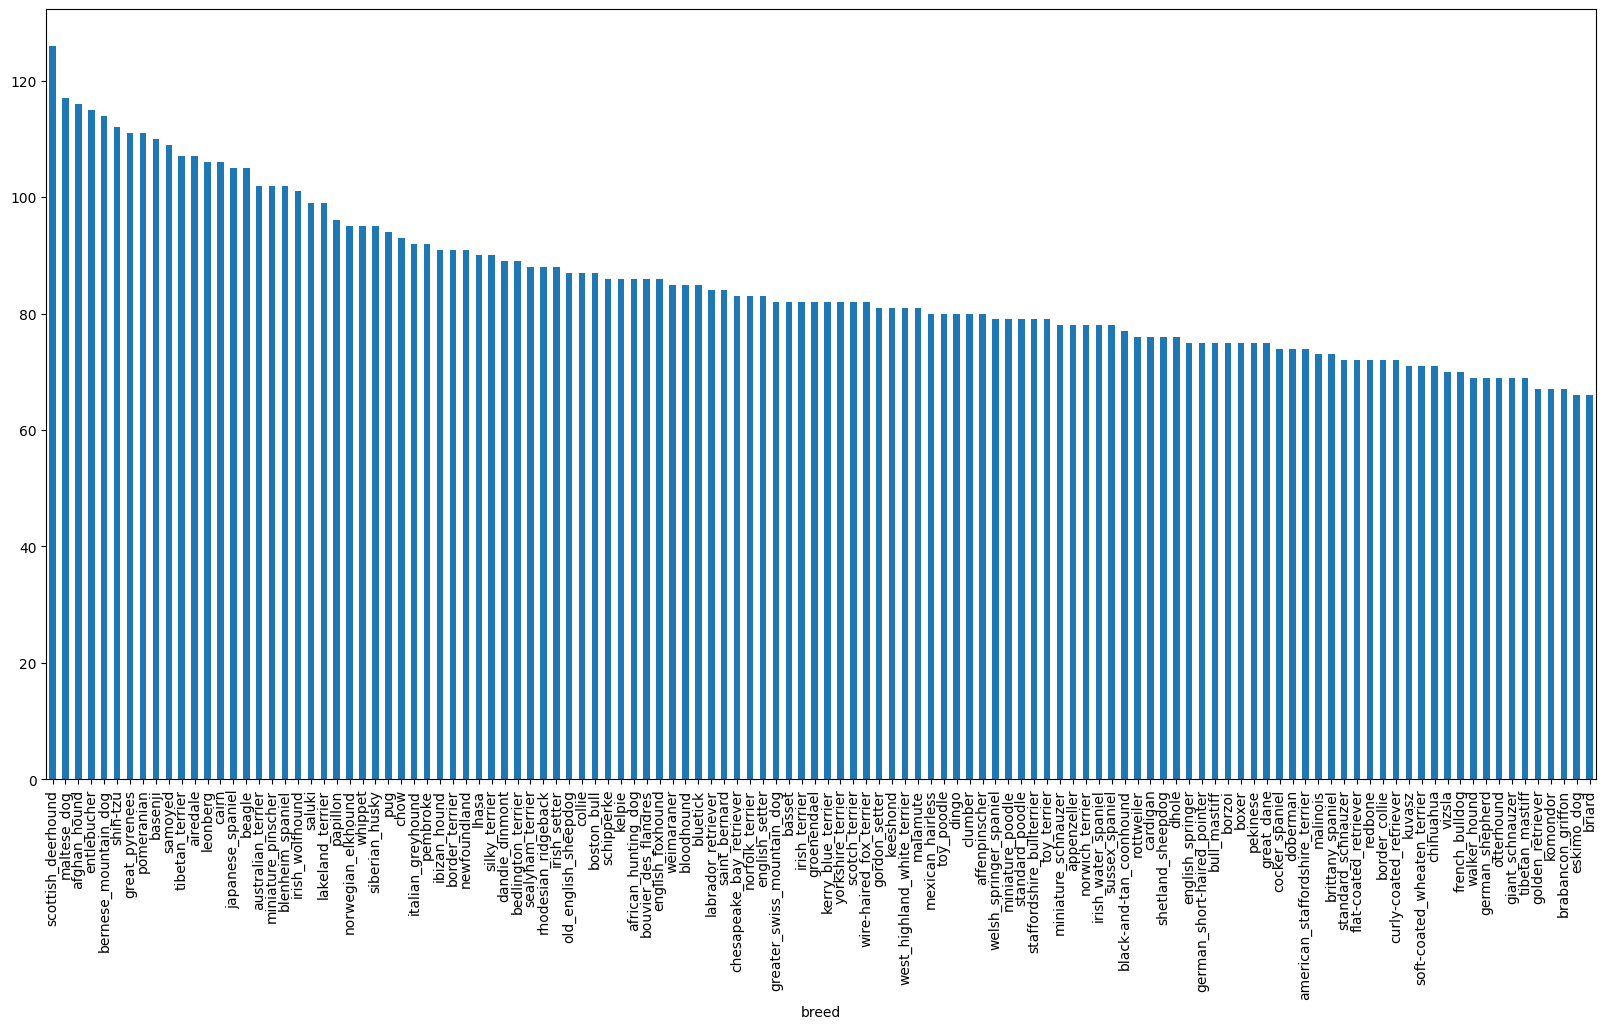

In [5]:
# How many images of each breed are there?
labels["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels["breed"].value_counts().median()

82.0

In [7]:
!pip install Ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.4 MB/s eta 0:00:00


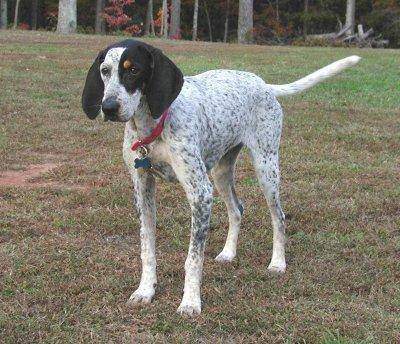

In [8]:
# let us veiw some of the images
import IPython.display as display 
display.Image("/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

##### Let us get the images and their lables

In [ ]:
# create a fathnames from our labels dataframe
filepaths = ["/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train/" + fname + ".jpg" 
             for fname in labels["id"]]
# check the first 10 filepaths
filepaths[:10]

['/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/dr

In [10]:
# check if the length of filepaths is the same as the length of actual images in the train folder
import os
if len(filepaths) == len(os.listdir("/content/drive/MyDrive/MultiClassDogBreedClassification/MultiClassDogBreedClassification/data/train")):
    print("The number of filepaths matches the number of images in the train folder.")
else:
    print("The number of filepaths does not match the number of images in the train folder.")

The number of filepaths matches the number of images in the train folder.


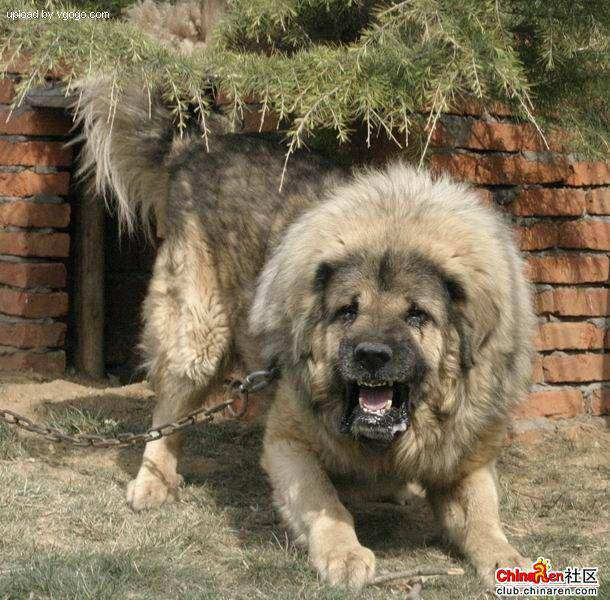

In [11]:
# let us check our filepaths
display.Image(filepaths[9000])

##### Turning Data labels in to array

In [12]:
import numpy as np
# cerate array of breeds
breeds = labels["breed"].to_numpy()
breeds

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
# check whether the number of labels matche the number of filepaths 
if (len(labels) == len(filepaths)):
    print("The number of labels matches the number of filepaths.")
else:
    print("The number of labels does not match the number of filepaths.")

The number of labels matches the number of filepaths.


In [14]:
# find the unique breeds in labels
unique_breeds = np.unique(breeds)
len(unique_breeds)

120

In [15]:
# turn every level in to Boolean
boolean_breed = [breed==unique_breeds for breed in breeds]
boolean_breed[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [16]:
# accesse the first label as number
print(boolean_breed[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


##### Creating Validation Set

In [17]:
# set X and y
X = filepaths
y = boolean_breed

we are going to do ~1000 images first and increase it later on as needed

In [18]:
# set the number of images for expermenting
NUM_IMAGES =1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [19]:
# split the data into training and validation  sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES], test_size=0.2, random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)


(800, 200, 800, 200)

##### Preprocess Image (turning images in to Tensors)
To process images in to Tensors we are going to write a function  a few things:
* Take an image file path as input
* Use Tensorflow to read the file and save it to a variable image 
* Turn our image (ajpg) in to Tensors
* Resize the image to be a shape(224, 224)
* Return the modified image 

In [21]:
IMAGE_SIZE = 224
def convert_image_to_tensor(image_path, Image_size=IMAGE_SIZE):
     """Takes an image path and turns it into a tensor."""
    # read in an image path
     image = tf.io.read_file(image_path)
     # Turn the image into  a numerical tensor with 3 color channels (RGB)
     image = tf.image.decode_jpeg(image, channels=3)
     # convert the image to float32 data type(normalization)
     image =tf.image.convert_image_dtype(image, tf.float32)
     # resize the image to desired value
     image = tf.image.resize(image, size=[Image_size, Image_size])
     return image 

##### Turning Data in to Batch
* why turn the data in to Batch?
  * let us say you are trying to process 10,000+ iamge in one go ... they all might not fir in to Memory.
  * so that is why we do about 32(batch size) images at time
* In order to use Tensorflow effectively , we need the data in form of Tensor Tuples which look like this:
   * `(image,label)

In [24]:
# create a simple function to return tuple of image and label
def get_image_label(image_path, boolean_breed):
    """Takes an image path and label and turns it into  a tuple of (image, label)."""
    image = convert_image_to_tensor(image_path)
    return image, boolean_breed

In [25]:
# check the output of our function
get_image_label(X_train[0], y_train[0])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.04452813, 0.0484497 , 0.05629283],
         [0.05633019, 0.06025176, 0.06809489],
         [0.04290967, 0.04683124, 0.05467437],
         ...,
         [0.07345551, 0.02696446, 0.0128119 ],
         [0.08338569, 0.06167922, 0.02458122],
         [0.09094839, 0.07918368, 0.04653312]],
 
        [[0.03778223, 0.04562537, 0.04161626],
         [0.0300378 , 0.03788094, 0.03387184],
         [0.07026608, 0.07810921, 0.07410011],
         ...,
         [0.2120701 , 0.20385231, 0.15405536],
         [0.06193235, 0.04972087, 0.03209355],
         [0.01333135, 0.00152287, 0.00104142]],
 
        [[0.08905759, 0.1049627 , 0.08513602],
         [0.09621842, 0.11212353, 0.09229685],
         [0.05104753, 0.06695264, 0.04712596],
         ...,
         [0.17335822, 0.20798706, 0.14030793],
         [0.3077376 , 0.30949864, 0.20433936],
         [0.37611565, 0.36580402, 0.250109  ]],
 
        ...,
 
        [[0.42239693, 0.37925968

In [26]:
# define a function to turn the data in Batch
BATCH_SIZE = 32
def create_data_batches(X, y=None, batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    """creates batche of data from image(X) and label(y) pairs.
    shuffles the training data but not the validation and test data.
    Also acccepts test data with no labels (y=None).
    """
    # if the dat is test data turn it into a tf.data.Dataset without labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))# only filepaths no labels
        # Convert Dataset in to batches
        data_batch= data.map(convert_image_to_tensor).batch(batch_size)
        return data_batch
    # if the data is validatin data turn it into a tf.data.Dataset with labels out shuffling
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # file paths and labels
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch 
    # if the data is training data turn it into a tf.data.Dataset with labels and shuffle
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # file paths and labels
        data = data.shuffle(buffer_size=len(X)) # shuffle the training data
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch 

In [27]:
# create Bacthes for training, validation sets
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [28]:
train_data, val_data

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>)

#### Visualize Our Batch Data Set
* our data is now in batches , however , these can be  alittle hard to understand , let us visualize it

In [29]:
import matplotlib.pyplot as plt
# define a function to view the image and label of a batch of data
def show_25_images(image,label):
    """Display 25 images and their labels from a batch of data."""
    plt.figure(figsize=(10,10))# set the figure size
    for i in range(25):
        ax = plt.subplot(5,5,i+1) # create a subplot of 5 rows and 5 columns
        plt.imshow(image[i]) # display the image 
        plt.title(unique_breeds[label[i].numpy().argmax()]) # set the title of the image to the breed name
        plt.axis("off") # turn off the axis

In [30]:
# let us unpack a batch of training data and view the images and labels
train_images, train_labels =next(iter(train_data))
train_images, train_labels

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.08032143, 0.06946708, 0.07338866],
          [0.61778015, 0.6165897 , 0.6105323 ],
          [0.05855922, 0.04521888, 0.01893852],
          ...,
          [0.25461388, 0.2310845 , 0.2310845 ],
          [0.2409634 , 0.2376371 , 0.22979397],
          [0.20273955, 0.20192525, 0.19408211]],
 
         [[0.05953991, 0.04868557, 0.05260714],
          [0.50224674, 0.5016449 , 0.49507308],
          [0.03474972, 0.02140586, 0.00348047],
          ...,
          [0.25207633, 0.2285469 , 0.2285469 ],
          [0.21285719, 0.19886254, 0.19438948],
          [0.2434503 , 0.23217663, 0.22679318]],
 
         [[0.05889997, 0.04804562, 0.05196719],
          [0.39864296, 0.39786038, 0.39886352],
          [0.02538222, 0.01172675, 0.00321529],
          ...,
          [0.25050467, 0.22966257, 0.22160059],
          [0.20726216, 0.18679479, 0.17854546],
          [0.27821386, 0.25335288, 0.24647257]],
 
         ...,
 
      

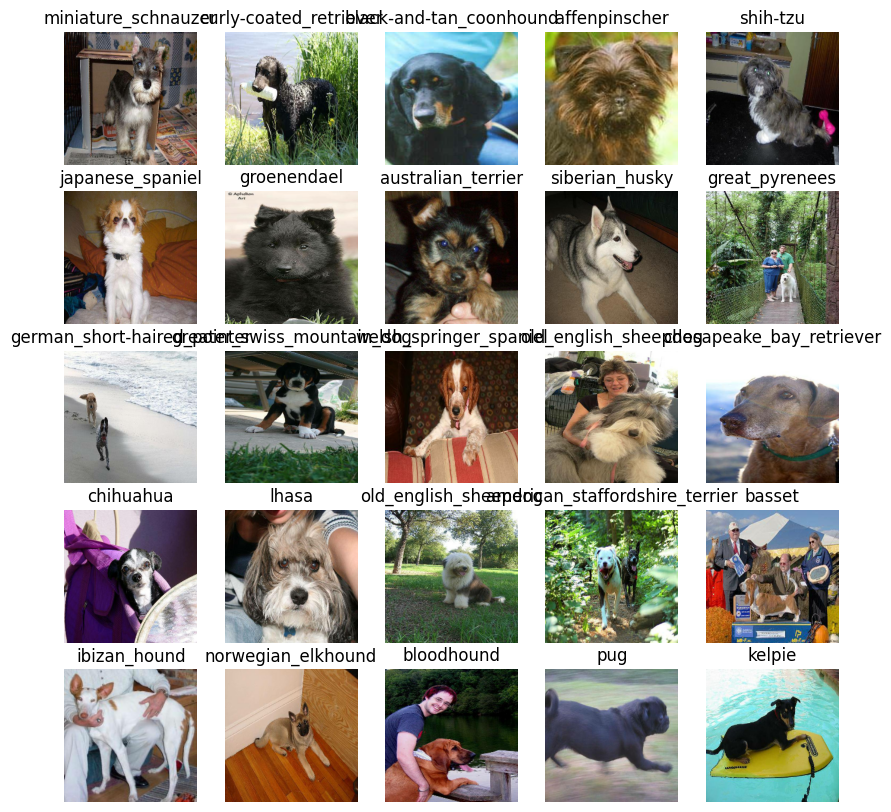

In [31]:
# let us visuallize the first 25 images of the training data and their labels
show_25_images(train_images, train_labels)